Q1. A particle experiences a force ($F$) which is a function of position $x$ $F(x)=(x-2)^{2}$. Find, using Newton's Method, the equilibrium position of the particle, correct to 2 decimal places.
$$
x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}
$$

In [125]:
import numpy as np
import math
import sympy as sp
import matplotlib.pyplot as plt
import time


In [ ]:
# Answer 1
def f(z):
    return (z-2)**2
def df(z):
    return (z-2)*2
x=1
tol=0.009
while np.abs(f(x))>tol:
    x = x - f(x)/df(x)
print(x)

1.9375


Q2. A particle experiences a force ($F$) which is a function of position $x$ $F(x)=(x-2)^{2}-4$. Find, using Bisection Method, the equilibrium position of the particle in the range $x\epsilon[2.5,5] $.Count the no. of steps for the root to be determined, correct to 2 decimal places.

4.0000152587890625 15


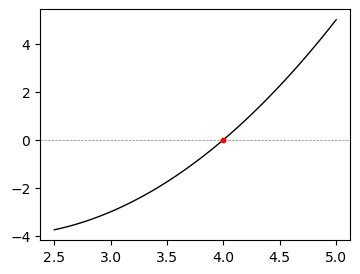

In [109]:
# Answer 2
def f(z):
    return (z-2)**2 -4
a=5
b=2.5
s=0
c=0
tol = 0.0001
while np.abs(a-b) > tol:
    c=(a+b)/2
    if f(a)*f(c)<0:
        b=c
    else:
        a=c
    s+=1
print(c,s)

x = np.linspace(2.5,5,100)
plt.figure(figsize=(4,3))
plt.axhline(0,linestyle='--',linewidth=0.5,color='grey',zorder=1)
plt.plot(x,f(x),color='black',linewidth=1,zorder=2)
plt.scatter(c,f(c),color='r',s=10,zorder=3)
plt.show()


Q3. A particle experiences a force ($F$) which is a function of position $x$ $F(x)=(x-2)^{2}-4$. Find, using Bisection Method, the equilibrium position of the particle $.Count the no. of steps for the root to be determined, correct to 2 decimal places.
$$
x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}
$$

In [123]:
def f(z):
    return (z-2)**2 -4
def df(z):
    return 2*(z-2)
x=2.5
tol=0.1
s=0
while np.abs(f(x))>tol:
    x = x - f(x)/df(x)
    s+=1
print(x,s)

4.0011287623992615 4


```mermaid
flowchart TD
    A([Start])
    B[/"x ← 2.5<br>tol ← 0.1<br>s ← 0"/]
    C{"Is absolute value<br> of f(x) > tolerence?"}
    D["$$x \leftarrow x-\frac{f(x)}{f'(x)} $$"]
    E[s ← s+1]
    F[print x and s]
    G([End])

    A --> B --> C
    C --> |Yes| D --> E --> C
    C --> |No| F ---> G
    

# Newton's Fractal
#### What is a Fractal?
Creating a shape using the shape we want.

##### Q4. $f=z^{3}-1$

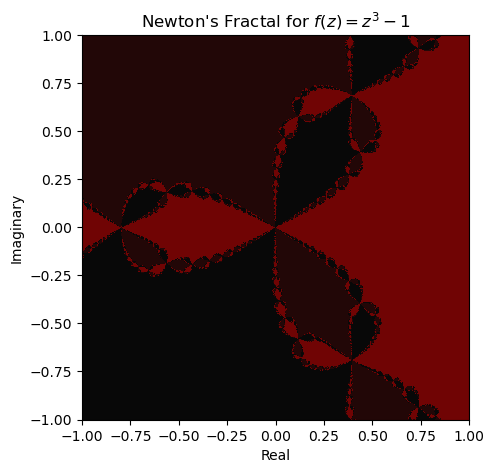

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
def f(z):
    return z**3 - 1

def df(z):
    return 3 * z**2


roots = np.array([ 1+0j , np.cos(2*np.pi/3) + np.sin(2*np.pi/3)*1j, np.cos(4*np.pi/3) + np.sin(4*np.pi/3)*1j])

size = 1000
x = np.linspace(-1,1,size)
y = np.linspace(-1,1,size)
X,Y = np.meshgrid(x,y)
Z = X + Y*1j

fractal = np.zeros(Z.shape, dtype=int)
tol = 1e-6
iter = 100


for i in range(iter):
    Z = Z - f(Z) / df(Z)

for k, r in enumerate(roots):
    fractal[np.abs(Z - r) < tol] = k + 1

cmap = ListedColormap(['#700404', '#220707', '#080808'])

plt.figure(figsize=(5, 5))
plt.pcolor(X,Y,fractal, cmap=cmap, shading='auto')
plt.title('Newton\'s Fractal for $f(z)=z^3-1$')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.show()